In [13]:
#Import der notwendigen Bibliotheken
import pandas as pd
import os
from scipy.io import arff
import csv
import numpy as np
from sklearn import datasets, model_selection

In [17]:
from scipy.io import arff
###Einlesen des Datensatzes
#pfad = 'C:/Users/benja/Documents/Persoenlich/Ausbildung/TU/Digitale_Kompetenzen/03_Anwendungsfelder_der_Digitalisierung/Machine_Learning/UE/1_Exercise/Datensaetze/breast_cancer/'
#data = pd.read_csv('breast-cancer-diagnostic.shuf.lrn.csv')

#pfad = 'C:/Users/benja/Documents/Persoenlich/Ausbildung/TU/Digitale_Kompetenzen/03_Anwendungsfelder_der_Digitalisierung/Machine_Learning/UE/1_Exercise/Datensaetze/congress_voting/'
#data = pd.read_csv(pfad + 'CongressionalVotingID.shuf.lrn.csv')

##Mammographic Mass Dataset
pfad = 'C:/Users/benja/Documents/Persoenlich/Ausbildung/TU/Digitale_Kompetenzen/03_Anwendungsfelder_der_Digitalisierung/Machine_Learning/UE/1_Exercise/Datensaetze/Mammographic_mass_dataset/'
data = pd.read_csv(pfad + 'mammographic_mass_data_set.csv', na_values='?', sep=';')
print(data)

     Index  BI-RADS    Age  Shape  Margin  Density  Severity
0        1      5.0  670.0    3.0     5.0      3.0         1
1        2      4.0  430.0    1.0     1.0      NaN         1
2        3      5.0  580.0    4.0     5.0      3.0         1
3        4      4.0  280.0    1.0     1.0      3.0         0
4        5      5.0  740.0    1.0     5.0      NaN         1
..     ...      ...    ...    ...     ...      ...       ...
956    957      4.0  470.0    2.0     1.0      3.0         0
957    958      4.0  560.0    4.0     5.0      3.0         1
958    959      4.0  640.0    4.0     5.0      3.0         0
959    960      5.0  660.0    4.0     5.0      3.0         1
960    961      4.0  620.0    3.0     3.0      3.0         0

[961 rows x 7 columns]


In [18]:
data_info = data.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Index     961 non-null    int64  
 1   BI-RADS   959 non-null    float64
 2   Age       956 non-null    float64
 3   Shape     930 non-null    float64
 4   Margin    913 non-null    float64
 5   Density   885 non-null    float64
 6   Severity  961 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 52.7 KB
None


In [19]:
#Umfang des Datensatzes
print(data.shape)

(961, 7)


In [20]:
#Statistische Eigenschaften des Datensatzes
data_descr = data.describe()
print(data_descr)

            Index     BI-RADS         Age       Shape      Margin     Density  \
count  961.000000  959.000000  956.000000  930.000000  913.000000  885.000000   
mean   481.000000    4.348279  554.874477    2.721505    2.796276    2.910734   
std    277.561104    1.783031  144.801308    1.242792    1.566546    0.380444   
min      1.000000    0.000000  180.000000    1.000000    1.000000    1.000000   
25%    241.000000    4.000000  450.000000    2.000000    1.000000    3.000000   
50%    481.000000    4.000000  570.000000    3.000000    3.000000    3.000000   
75%    721.000000    5.000000  660.000000    4.000000    4.000000    3.000000   
max    961.000000   55.000000  960.000000    4.000000    5.000000    4.000000   

         Severity  
count  961.000000  
mean     0.463059  
std      0.498893  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000  


<Axes: ylabel='count'>

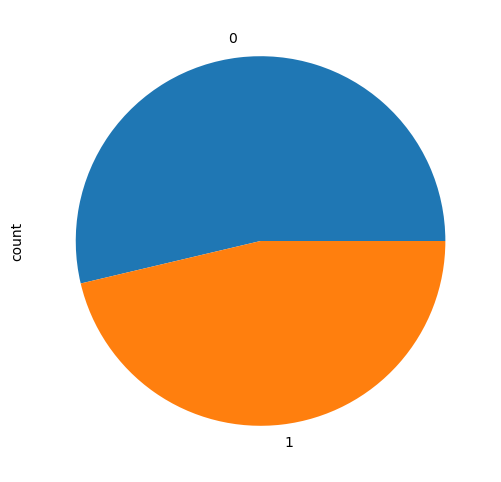

In [22]:
#Vorkommen von korrekt erkanntem Brustkrebs
data['Severity'].value_counts().plot(kind='pie', figsize=(6,6))
#plt.title("Breast Cancer correctly detected")
#plt.title("Severity")

In [23]:
#Korrelationsmatrix
corr = data.corr()
print(corr)

             Index   BI-RADS       Age     Shape    Margin   Density  Severity
Index     1.000000 -0.033678 -0.019340  0.037399 -0.020928  0.093854  0.033430
BI-RADS  -0.033678  1.000000  0.094754  0.186055  0.163086  0.038729  0.231601
Age      -0.019340  0.094754  1.000000  0.364077  0.411355  0.028954  0.432066
Shape     0.037399  0.186055  0.364077  1.000000  0.742211  0.078666  0.563308
Margin   -0.020928  0.163086  0.411355  0.742211  1.000000  0.109392  0.574919
Density   0.093854  0.038729  0.028954  0.078666  0.109392  1.000000  0.064010
Severity  0.033430  0.231601  0.432066  0.563308  0.574919  0.064010  1.000000


In [24]:
#Überblick der Charakteristika mit der höchsten Korrelation zum Zielcharakteristikum
corr_class = corr['Severity']
corr_sorted = corr_class.abs().sort_values(ascending=False)
print(corr_sorted)

Severity    1.000000
Margin      0.574919
Shape       0.563308
Age         0.432066
BI-RADS     0.231601
Density     0.064010
Index       0.033430
Name: Severity, dtype: float64


In [30]:
#Fehlende Werte enthalten?
data.isna().sum()

Index        0
BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

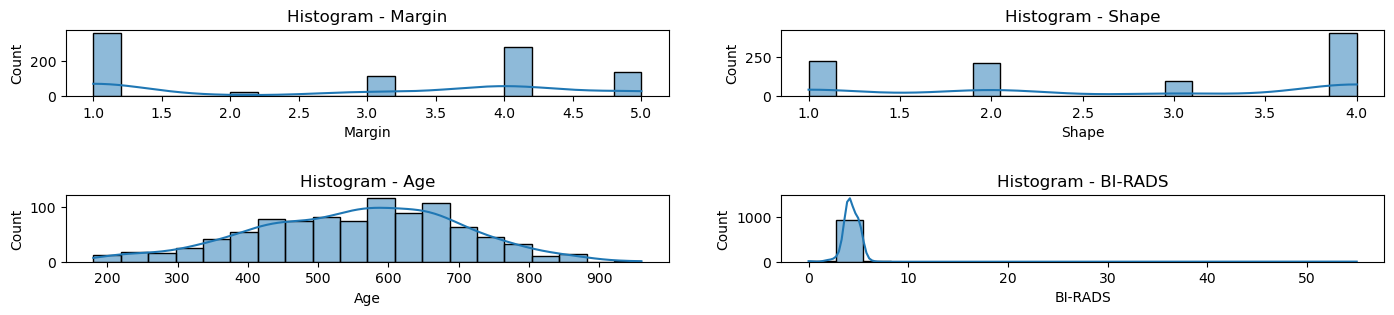

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Specify the columns you want to plot
selected_columns = ['Margin', 'Shape', 'Age','BI-RADS']  # Replace with the actual column names

# Set up the layout for subplots
fig, axes = plt.subplots(nrows=len(selected_columns)//2, ncols=2, figsize=(15, 2*len(selected_columns)//2))
fig.tight_layout(pad=5.0)  # Adjust the padding between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each selected column
for i, column in enumerate(selected_columns):
    sns.histplot(data[column], ax=axes[i], kde=True, bins=20)
    axes[i].set_title(f'Histogram - {column}')

plt.show()

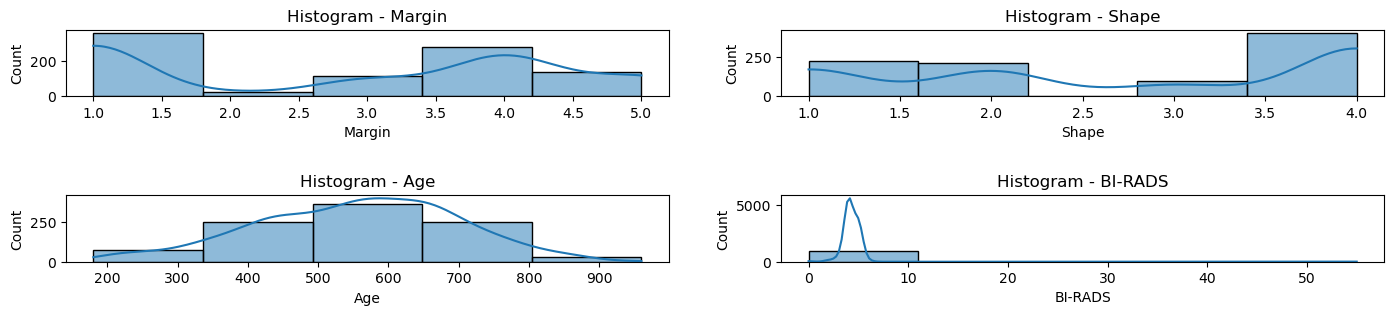

In [40]:
# Specify the columns you want to plot
selected_columns = ['Margin', 'Shape', 'Age','BI-RADS']  # Replace with the actual column names

# Set up the layout for subplots
fig, axes = plt.subplots(nrows=len(selected_columns)//2, ncols=2, figsize=(15, 2*len(selected_columns)//2))
fig.tight_layout(pad=5.0)  # Adjust the padding between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each selected column
for i, column in enumerate(selected_columns):
    sns.histplot(data[column], ax=axes[i], kde=True, bins=5)
    axes[i].set_title(f'Histogram - {column}')

plt.show()